In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

source_dir = 'C:/Users/aleem/OneDrive/Documents/MMA Datathon 2022'

In [3]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [4]:
trans = pd.read_csv(source_dir + '/transactions.csv')
demo = pd.read_csv(source_dir + '/demographics.csv')
merged = trans.merge(demo, how='inner')
merged['MARITAL_STATUS_CODE'] = np.where(merged['MARITAL_STATUS_CODE'] == 'A', 'Married', np.where(merged['MARITAL_STATUS_CODE'] == 'B', 'Single', 'Unknown'))
merged['Loyalty_Card_Price'] = (merged['SALES_VALUE'] - (merged['RETAIL_DISC'] + merged['COUPON_MATCH_DISC']))/merged['QUANTITY']
merged['Non_Loyalty_Card_Price'] = (merged['SALES_VALUE'] - merged['COUPON_MATCH_DISC'])/merged['QUANTITY']
merged = merged[merged.BRAND == 'National']
merged.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,CURR_SIZE_OF_PRODUCT,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,Loyalty_Card_Price,Non_Loyalty_Card_Price
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1520,1,...,9.5 OZ,65+,Single,100-124K,Homeowner,Single Female,1,None/Unknown,3.39,2.99
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1520,1,...,,65+,Single,100-124K,Homeowner,Single Female,1,None/Unknown,3.09,3.09
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1520,1,...,12OZ,65+,Single,100-124K,Homeowner,Single Female,1,None/Unknown,3.49,2.50
6,1364,27081336145,9,5568828,1,3.19,31742,0.00,1554,2,...,12 OZ,65+,Single,100-124K,Homeowner,Single Female,1,None/Unknown,3.19,3.19
7,1364,27081336162,9,9446690,1,1.00,31742,0.00,1558,2,...,,65+,Single,100-124K,Homeowner,Single Female,1,None/Unknown,1.00,1.00


In [5]:
merged.dtypes

household_key               int64
BASKET_ID                   int64
DAY                         int64
PRODUCT_ID                  int64
QUANTITY                    int64
SALES_VALUE               float64
STORE_ID                    int64
RETAIL_DISC               float64
TRANS_TIME                  int64
WEEK_NO                     int64
COUPON_MATCH_DISC         float64
MANUFACTURER                int64
DEPARTMENT                 object
BRAND                      object
COMMODITY_DESC             object
SUB_COMMODITY_DESC         object
CURR_SIZE_OF_PRODUCT       object
AGE_DESC                   object
MARITAL_STATUS_CODE        object
INCOME_DESC                object
HOMEOWNER_DESC             object
HH_COMP_DESC               object
HOUSEHOLD_SIZE_DESC        object
KID_CATEGORY_DESC          object
Loyalty_Card_Price        float64
Non_Loyalty_Card_Price    float64
dtype: object

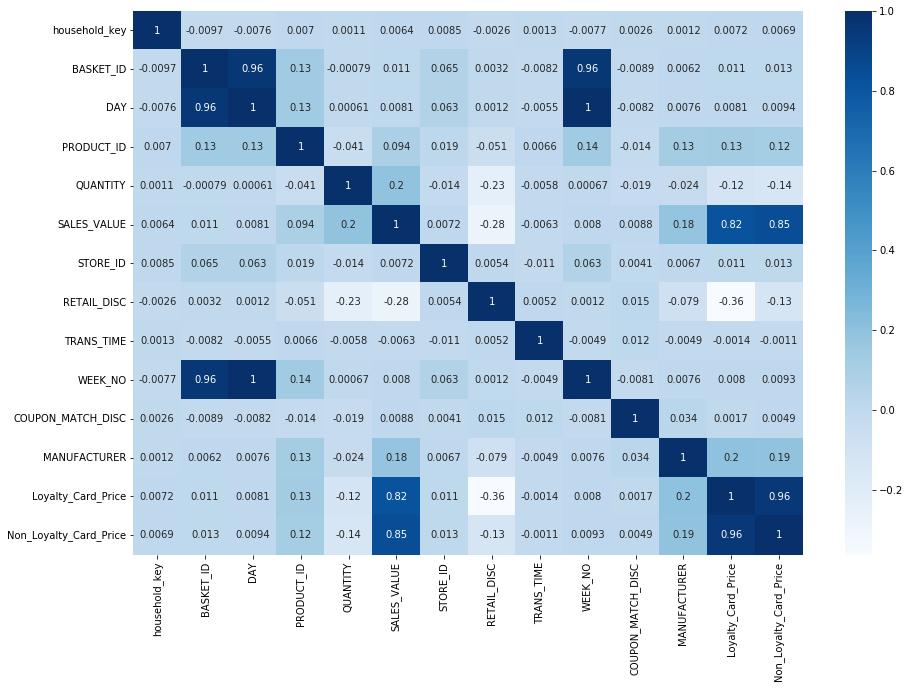

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(merged.corr(), cbar = True, annot = True, cmap = 'Blues')

Text(0, 0.5, 'Sales')

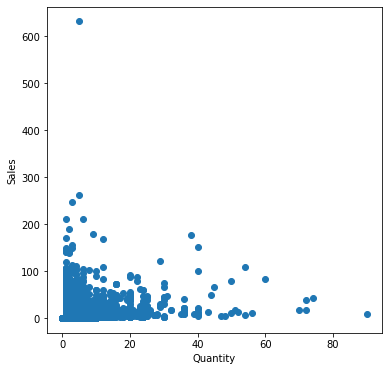

In [7]:
plt.figure(figsize = (6,6))
plt.scatter(x= 'QUANTITY', y = 'SALES_VALUE', data = merged)
plt.xlabel('Quantity')
plt.ylabel('Sales')

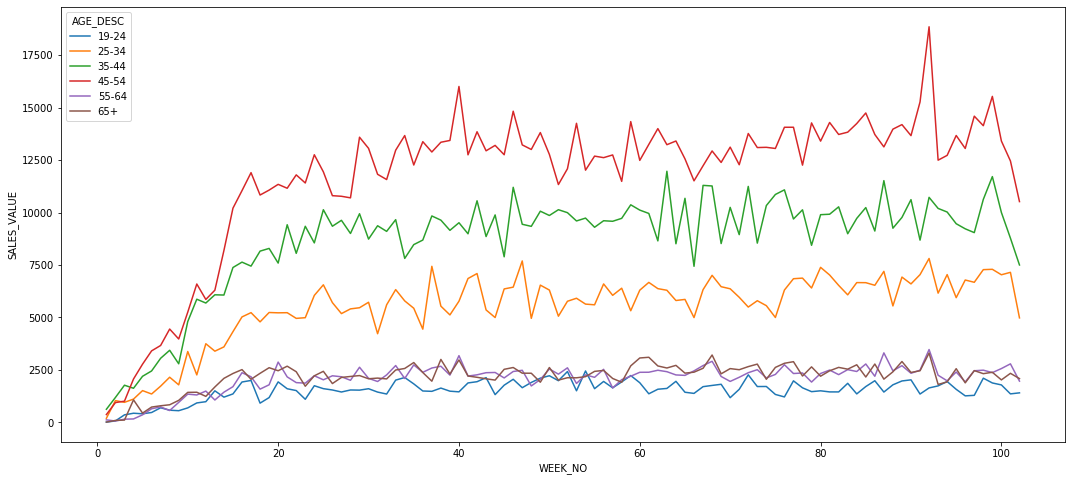

In [10]:
plt.figure(figsize=(18,8))
data = merged.groupby(['WEEK_NO', 'AGE_DESC'], as_index=False)['SALES_VALUE'].sum()
sns.lineplot(data=data, x='WEEK_NO', y='SALES_VALUE', hue = 'AGE_DESC')

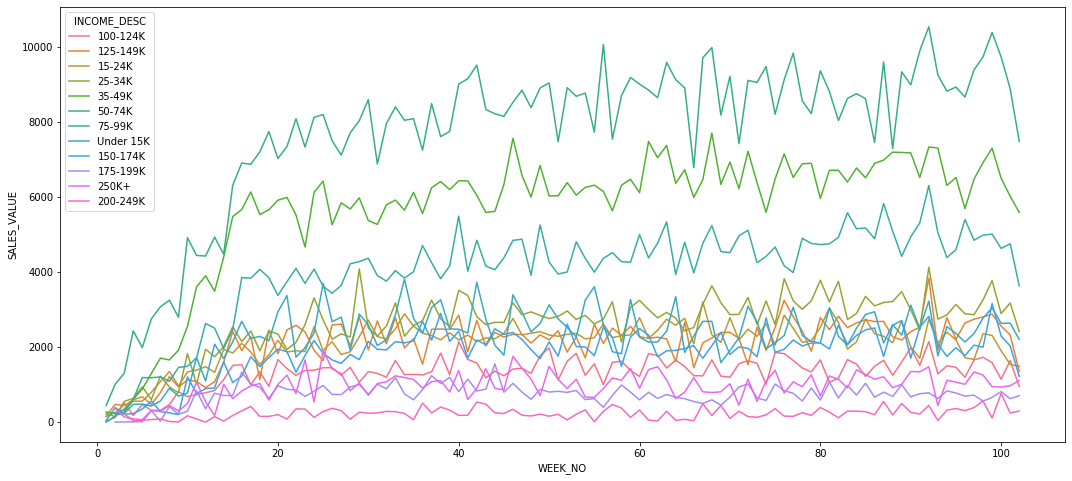

In [11]:
plt.figure(figsize=(18,8))
data = merged.groupby(['WEEK_NO', 'INCOME_DESC'], as_index=False)['SALES_VALUE'].sum()
sns.lineplot(data=data, x='WEEK_NO', y='SALES_VALUE', hue = 'INCOME_DESC')

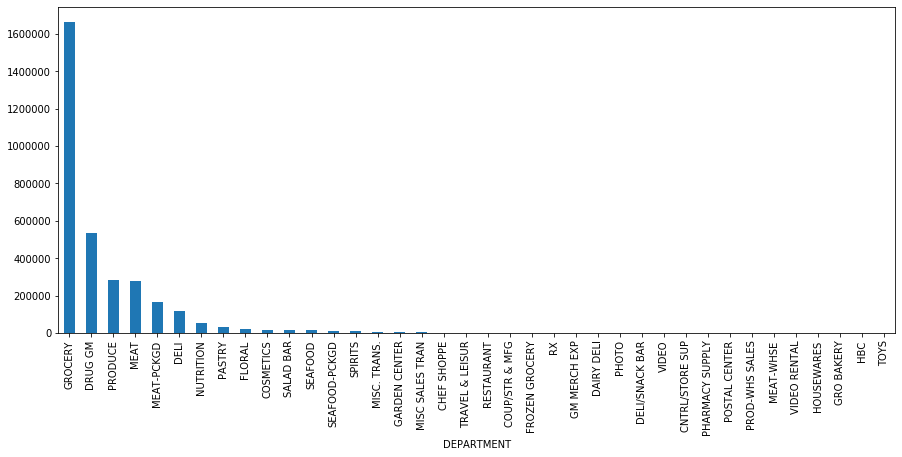

In [112]:
plt.figure(figsize = (15,6))
merged.groupby('DEPARTMENT').SALES_VALUE.sum().sort_values(ascending = False).plot.bar()

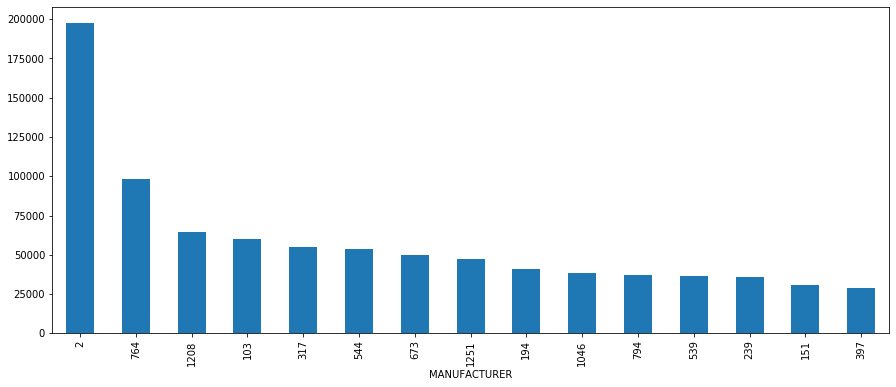

In [115]:
plt.figure(figsize = (15,6))
merged.groupby('MANUFACTURER').SALES_VALUE.sum().sort_values(ascending = False).head(15).plot.bar()

In [12]:
import altair as alt

In [13]:
data = merged.groupby(['AGE_DESC', 'INCOME_DESC'], as_index=False)['SALES_VALUE'].sum()
alt.Chart(data).mark_circle().encode(x = 'AGE_DESC', y = 'INCOME_DESC', color = 'SALES_VALUE', size = 'SALES_VALUE').properties(width =400, height=400, title = "Spending on National Brands (Income & Age)")

alt.Chart(...)

In [14]:
data = merged.groupby(['AGE_DESC', 'INCOME_DESC'], as_index=False)['SALES_VALUE'].sum().sort_values(by = 'SALES_VALUE',ascending=False)
data[:10]

,AGE_DESC,INCOME_DESC,SALES_VALUE
40,45-54,50-74K,318239.99
28,35-44,50-74K,190617.19
41,45-54,75-99K,178526.77
27,35-44,35-49K,172212.30
16,25-34,50-74K,159803.94
39,45-54,35-49K,152906.90
29,35-44,75-99K,130191.83
15,25-34,35-49K,113571.17
37,45-54,25-34K,98507.86
32,45-54,125-149K,92851.87


In [15]:
cust_ages45_54_incomes50_74 = merged[(merged.INCOME_DESC == '50-74K') | (merged.AGE_DESC == '45-54')]
cust_ages45_54_incomes50_74.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,CURR_SIZE_OF_PRODUCT,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,Loyalty_Card_Price,Non_Loyalty_Card_Price
4564,1172,26985025264,1,877180,1,2.29,396,0.00,946,1,...,,25-34,Single,50-74K,Unknown,Single Male,1,None/Unknown,2.29,2.29
4565,1172,26985025264,1,878664,1,2.00,396,-0.99,946,1,...,6 OZ,25-34,Single,50-74K,Unknown,Single Male,1,None/Unknown,2.99,2.00
4566,1172,26985025264,1,930917,2,2.00,396,-0.78,946,1,...,15 OZ,25-34,Single,50-74K,Unknown,Single Male,1,None/Unknown,1.39,1.00
4567,1172,26985025264,1,940796,1,3.59,396,0.00,946,1,...,15 OZ,25-34,Single,50-74K,Unknown,Single Male,1,None/Unknown,3.59,3.59
4570,1172,26985025264,1,1000493,1,4.44,396,-0.89,946,1,...,,25-34,Single,50-74K,Unknown,Single Male,1,None/Unknown,5.33,4.44


In [16]:
data = cust_ages45_54_incomes50_74.groupby(['DEPARTMENT'], as_index=False)['SALES_VALUE'].sum().sort_values(by='SALES_VALUE', ascending =False).head(5)
data

,DEPARTMENT,SALES_VALUE
13,GROCERY,855767.74
7,DRUG GM,278599.10
26,PRODUCE,145007.11
15,MEAT,141247.19
16,MEAT-PCKGD,78830.01


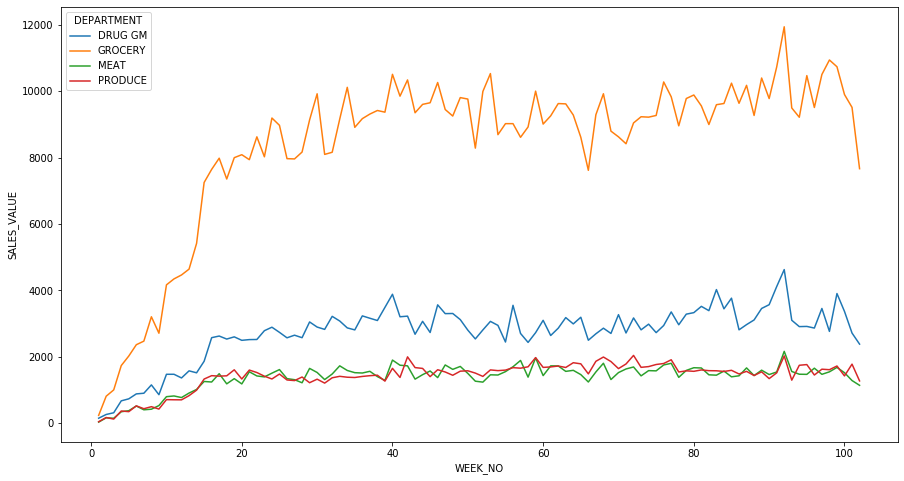

In [17]:
plt.figure(figsize=(15,8))
data = cust_ages45_54_incomes50_74.groupby(['WEEK_NO', 'DEPARTMENT'], as_index=False)['SALES_VALUE'].sum()
data = data[(data.DEPARTMENT == 'GROCERY') | (data.DEPARTMENT == 'MEAT') | (data.DEPARTMENT == 'PRODUCE') | (data.DEPARTMENT == 'DRUG GM')]
sns.lineplot(data=data, x='WEEK_NO', y='SALES_VALUE', hue = 'DEPARTMENT')

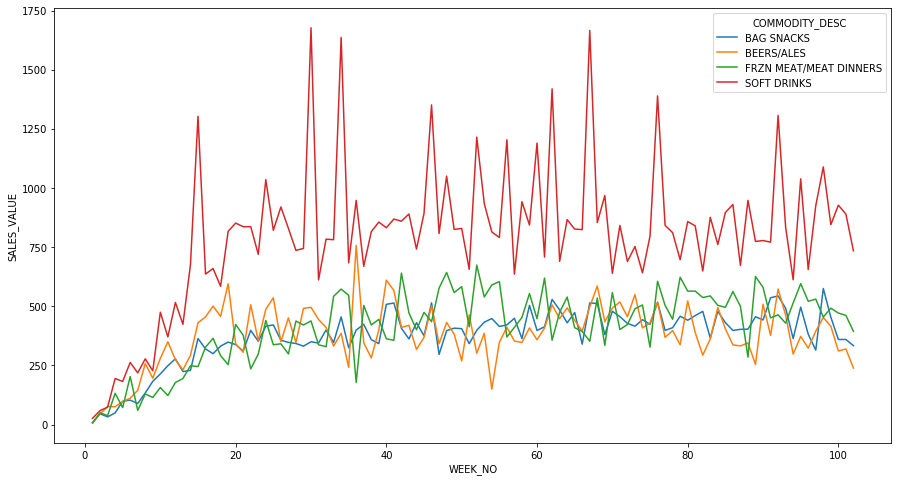

In [18]:
plt.figure(figsize=(15,8))
data = cust_ages45_54_incomes50_74.groupby(['WEEK_NO', 'DEPARTMENT', 'COMMODITY_DESC'], as_index=False)['SALES_VALUE'].sum()
data = data[data.DEPARTMENT == 'GROCERY']
data = data[(data.COMMODITY_DESC == 'SOFT DRINKS') | (data.COMMODITY_DESC == 'FRZN MEAT/MEAT DINNERS') | (data.COMMODITY_DESC == 'BEERS/ALES') | (data.COMMODITY_DESC == 'BAG SNACKS')]
sns.lineplot(data=data, x='WEEK_NO', y='SALES_VALUE', hue = 'COMMODITY_DESC')

In [19]:
data = cust_ages45_54_incomes50_74.groupby(['DEPARTMENT', 'COMMODITY_DESC'], as_index=False)['SALES_VALUE'].sum()
data[data.DEPARTMENT == 'GROCERY'].sort_values(by = 'SALES_VALUE', ascending = False).head()

,DEPARTMENT,COMMODITY_DESC,SALES_VALUE
210,GROCERY,SOFT DRINKS,81476.51
174,GROCERY,FRZN MEAT/MEAT DINNERS,42095.45
134,GROCERY,BEERS/ALES,38746.75
127,GROCERY,BAG SNACKS,38213.48
168,GROCERY,FROZEN PIZZA,31821.41


In [20]:
data = cust_ages45_54_incomes50_74.groupby(['DEPARTMENT', 'MANUFACTURER'], as_index=False)['SALES_VALUE'].sum()
data[data.DEPARTMENT == 'GROCERY'].sort_values(by = 'SALES_VALUE', ascending = False).head(10)

,DEPARTMENT,MANUFACTURER,SALES_VALUE
2693,GROCERY,1208,33851.20
2325,GROCERY,103,31989.60
2525,GROCERY,764,31930.93
2402,GROCERY,317,28226.59
2469,GROCERY,544,28090.38
2705,GROCERY,1251,22174.83
2359,GROCERY,194,20206.18
2648,GROCERY,1046,19831.29
2534,GROCERY,794,18805.84
2376,GROCERY,239,16625.56


In [21]:
data = cust_ages45_54_incomes50_74.groupby(['DEPARTMENT', 'COMMODITY_DESC'], as_index=False)['SALES_VALUE'].sum()
data[data.DEPARTMENT == 'DRUG GM'].sort_values(by = 'SALES_VALUE', ascending = False).head()

,DEPARTMENT,COMMODITY_DESC,SALES_VALUE
37,DRUG GM,CIGARETTES,30237.00
34,DRUG GM,CANDY - PACKAGED,22618.54
65,DRUG GM,HAIR CARE PRODUCTS,13026.27
44,DRUG GM,DIAPERS & DISPOSABLES,12747.80
63,DRUG GM,GREETING CARDS/WRAP/PARTY SPLY,11682.39


In [22]:
data = cust_ages45_54_incomes50_74.groupby(['DEPARTMENT', 'MANUFACTURER'], as_index=False)['SALES_VALUE'].sum()
data[data.DEPARTMENT == 'DRUG GM'].sort_values(by = 'SALES_VALUE', ascending = False).head(10)

,DEPARTMENT,MANUFACTURER,SALES_VALUE
901,DRUG GM,539,20676.08
977,DRUG GM,764,19367.19
955,DRUG GM,693,11014.15
1763,DRUG GM,5143,7914.80
756,DRUG GM,111,6576.19
1185,DRUG GM,1420,6461.37
1013,DRUG GM,857,5607.04
973,DRUG GM,751,5282.38
776,DRUG GM,177,4879.02
1105,DRUG GM,1156,4757.44


In [23]:
data = cust_ages45_54_incomes50_74.groupby(['DEPARTMENT', 'COMMODITY_DESC'], as_index=False)['SALES_VALUE'].sum()
data[data.DEPARTMENT == 'PRODUCE'].sort_values(by = 'SALES_VALUE', ascending = False).head()

,DEPARTMENT,COMMODITY_DESC,SALES_VALUE
307,PRODUCE,TROPICAL FRUIT,12126.18
302,PRODUCE,SALAD MIX,12067.71
283,PRODUCE,BERRIES,11487.33
282,PRODUCE,APPLES,11004.10
289,PRODUCE,GRAPES,9609.62


In [24]:
data = cust_ages45_54_incomes50_74.groupby(['DEPARTMENT', 'MANUFACTURER'], as_index=False)['SALES_VALUE'].sum()
data[data.DEPARTMENT == 'PRODUCE'].sort_values(by = 'SALES_VALUE', ascending = False).head(10)

,DEPARTMENT,MANUFACTURER,SALES_VALUE
4780,PRODUCE,2,75298.04
4806,PRODUCE,673,18704.22
4839,PRODUCE,1646,10765.32
4938,PRODUCE,5937,5895.17
4804,PRODUCE,649,2261.37
4829,PRODUCE,1441,1976.90
4898,PRODUCE,5124,1834.20
4798,PRODUCE,499,1701.16
4838,PRODUCE,1633,1554.83
4946,PRODUCE,6082,1514.60


In [25]:
data = cust_ages45_54_incomes50_74.groupby(['DEPARTMENT', 'COMMODITY_DESC'], as_index=False)['SALES_VALUE'].sum()
data[data.DEPARTMENT == 'MEAT'].sort_values(by = 'SALES_VALUE', ascending = False).head()

,DEPARTMENT,COMMODITY_DESC,SALES_VALUE
222,MEAT,BEEF,79360.47
223,MEAT,CHICKEN,25662.33
228,MEAT,PORK,22297.96
230,MEAT,SMOKED MEATS,7009.94
231,MEAT,TURKEY,5911.01


In [26]:
data = cust_ages45_54_incomes50_74.groupby(['DEPARTMENT', 'MANUFACTURER'], as_index=False)['SALES_VALUE'].sum()
data[data.DEPARTMENT == 'MEAT'].sort_values(by = 'SALES_VALUE', ascending = False).head(10)

,DEPARTMENT,MANUFACTURER,SALES_VALUE
3997,MEAT,4314,9262.29
3574,MEAT,2852,6533.44
3568,MEAT,2845,4487.80
3543,MEAT,2808,3925.68
4207,MEAT,5154,3301.37
3576,MEAT,2854,2581.52
3558,MEAT,2830,2307.93
3768,MEAT,3452,2248.38
3951,MEAT,4182,2213.01
3553,MEAT,2822,2123.54


In [27]:
data = cust_ages45_54_incomes50_74.groupby(['MARITAL_STATUS_CODE'], as_index=False)['SALES_VALUE'].sum()
data.sort_values(by = 'SALES_VALUE', ascending = False).head(10)

,MARITAL_STATUS_CODE,SALES_VALUE
2,Unknown,782166.14
0,Married,742209.99
1,Single,144770.32


In [28]:
data = merged.groupby(['AGE_DESC', 'INCOME_DESC', 'MARITAL_STATUS_CODE'], as_index=False)['SALES_VALUE'].sum()
data1 = data[data.MARITAL_STATUS_CODE == 'Married']
alt.Chart(data1).mark_circle().encode(x = 'AGE_DESC', y = 'INCOME_DESC', color = 'SALES_VALUE', size = 'SALES_VALUE').properties(width =400, height=400, title = 'Married Customers by Age and Income')

alt.Chart(...)

In [222]:
data = merged.groupby(['AGE_DESC', 'INCOME_DESC', 'MARITAL_STATUS_CODE'], as_index=False)['SALES_VALUE'].sum()
data3 = data[data.MARITAL_STATUS_CODE == 'Unknown']
alt.Chart(data3).mark_circle().encode(x = 'AGE_DESC', y = 'INCOME_DESC', color = 'SALES_VALUE', size = 'SALES_VALUE').properties(width =400, height=400, title = 'Unknown marital status')

alt.Chart(...)

In [30]:
data = merged.groupby(['HOMEOWNER_DESC'], as_index=False)['SALES_VALUE'].sum()
data.sort_values(by = 'SALES_VALUE', ascending = False).head(10)

,HOMEOWNER_DESC,SALES_VALUE
0,Homeowner,2.198284e+06
4,Unknown,8.065632e+05
3,Renter,1.627792e+05
1,Probable Owner,3.985860e+04
2,Probable Renter,3.364438e+04


In [31]:
data = merged.groupby(['AGE_DESC', 'INCOME_DESC', 'HOMEOWNER_DESC'], as_index=False)['SALES_VALUE'].sum()
data1 = data[data.HOMEOWNER_DESC == 'Homeowner']
alt.Chart(data1).mark_circle().encode(x = 'AGE_DESC', y = 'INCOME_DESC', color = 'SALES_VALUE', size = 'SALES_VALUE').properties(width =400, height=400, title = 'Spending on National Brands - Homeowner')

alt.Chart(...)

In [32]:
data = merged[merged.HOMEOWNER_DESC == 'Homeowner']
data = data[data.AGE_DESC == '45-54']
data = data[data.INCOME_DESC == '50-74K']
data = data.groupby(['DEPARTMENT'], as_index=False)['SALES_VALUE'].sum().sort_values(by = 'SALES_VALUE', ascending = False)
data.head()

,DEPARTMENT,SALES_VALUE
9,GROCERY,118475.76
5,DRUG GM,38049.62
11,MEAT,19905.69
18,PRODUCE,18958.47
12,MEAT-PCKGD,11142.31


In [33]:
data = merged.groupby(['HOUSEHOLD_SIZE_DESC'], as_index=False)['SALES_VALUE'].sum()
data.sort_values(by = 'SALES_VALUE', ascending = False).head(10)

,HOUSEHOLD_SIZE_DESC,SALES_VALUE
1,2,1.285031e+06
0,1,9.161796e+05
2,3,4.874560e+05
4,5+,3.130310e+05
3,4,2.394319e+05


In [34]:
data = merged.groupby(['AGE_DESC', 'INCOME_DESC', 'HOUSEHOLD_SIZE_DESC'], as_index=False)['SALES_VALUE'].sum()
data1 = data[data.HOUSEHOLD_SIZE_DESC == '2']
alt.Chart(data1).mark_circle().encode(x = 'AGE_DESC', y = 'INCOME_DESC', color = 'SALES_VALUE', size = 'SALES_VALUE').properties(width =400, height=400, title = 'Household Size = 2')

alt.Chart(...)

In [35]:
data = merged[merged.HOUSEHOLD_SIZE_DESC == '2']
data = data[data.AGE_DESC == '45-54']
data = data[data.INCOME_DESC == '50-74K']
data = data.groupby(['HH_COMP_DESC'], as_index=False)['SALES_VALUE'].sum().sort_values(by = 'SALES_VALUE', ascending = False)
data.head()

,HH_COMP_DESC,SALES_VALUE
1,2 Adults No Kids,113811.96
0,1 Adult Kids,12422.80
2,Unknown,534.51


In [36]:
data = merged[merged.HOUSEHOLD_SIZE_DESC == '2']
data = data[data.AGE_DESC == '45-54']
data = data[data.INCOME_DESC == '50-74K']
data = data.groupby(['DEPARTMENT'], as_index=False)['SALES_VALUE'].sum().sort_values(by = 'SALES_VALUE', ascending = False)
data.head()

,DEPARTMENT,SALES_VALUE
8,GROCERY,68589.31
4,DRUG GM,17928.90
10,MEAT,11775.85
16,PRODUCE,8950.06
11,MEAT-PCKGD,5919.84


In [37]:
data = merged[merged.HOUSEHOLD_SIZE_DESC == '2']
data = data[data.AGE_DESC == '45-54']
data = data[data.INCOME_DESC == '50-74K']
data = data.groupby(['MANUFACTURER'], as_index=False)['SALES_VALUE'].sum().sort_values(by = 'SALES_VALUE', ascending = False)
data.head()

,MANUFACTURER,SALES_VALUE
0,2,6590.56
280,764,3087.20
124,317,2334.82
256,697,2079.90
480,1251,2038.45


In [38]:
data = merged.groupby(['AGE_DESC', 'INCOME_DESC', 'HOUSEHOLD_SIZE_DESC'], as_index=False)['SALES_VALUE'].sum()
data1 = data[data.HOUSEHOLD_SIZE_DESC == '1']
alt.Chart(data1).mark_circle().encode(x = 'AGE_DESC', y = 'INCOME_DESC', color = 'SALES_VALUE', size = 'SALES_VALUE').properties(width =400, height=400, title = 'Household Size = 1')

alt.Chart(...)

In [39]:
data = merged[merged.HOUSEHOLD_SIZE_DESC == '1']
data = data[data.AGE_DESC == '45-54']
data = data[data.INCOME_DESC == '50-74K']
data = data.groupby(['HH_COMP_DESC'], as_index=False)['SALES_VALUE'].sum().sort_values(by = 'SALES_VALUE', ascending = False)
data.head()

,HH_COMP_DESC,SALES_VALUE
2,Unknown,106377.77
0,Single Female,23989.49
1,Single Male,9687.98


Is there evidence to suggest that direct marketing improves overall engagement?
How does marketing impact sales and demand?

In [41]:
new_cols = ['QUANTITY', 'SALES_VALUE', 'Loyalty_Card_Price', 'Non_Loyalty_Card_Price']
reg_ds = merged[new_cols]
reg_ds['Price_Per_Unit'] = reg_ds['SALES_VALUE']/reg_ds['QUANTITY']
reg_ds = reg_ds.drop(['SALES_VALUE'], axis = 1)
new_cols = ['Price_Per_Unit', 'Loyalty_Card_Price', 'Non_Loyalty_Card_Price', 'QUANTITY']
reg_ds = reg_ds[new_cols]
reg_ds.head()

C:\Users\aleem\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Price_Per_Unit,Loyalty_Card_Price,Non_Loyalty_Card_Price,QUANTITY
1,2.99,3.39,2.99,1
2,3.09,3.09,3.09,1
3,2.50,3.49,2.50,1
6,3.19,3.19,3.19,1
7,1.00,1.00,1.00,1


In [42]:
 x = pd.DataFrame(reg_ds.replace([np.inf, -np.inf], np.nan))
 x = x.fillna(method='ffill')
 x = x.fillna(method='bfill')

In [43]:
reg_ds.corr()

,Price_Per_Unit,Loyalty_Card_Price,Non_Loyalty_Card_Price,QUANTITY
Price_Per_Unit,1.000000,0.956413,0.999884,-0.135816
Loyalty_Card_Price,0.956413,1.000000,0.956562,-0.122445
Non_Loyalty_Card_Price,0.999884,0.956562,1.000000,-0.136000
QUANTITY,-0.135816,-0.122445,-0.136000,1.000000


In [44]:
from statsmodels.regression import linear_model
X = x.drop('QUANTITY', axis=1)
y = x['QUANTITY']
model = linear_model.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               QUANTITY   R-squared (uncentered):                   0.290
Model:                            OLS   Adj. R-squared (uncentered):              0.290
Method:                 Least Squares   F-statistic:                          1.382e+05
Date:                Mon, 17 Oct 2022   Prob (F-statistic):                        0.00
Time:                        12:28:16   Log-Likelihood:                     -1.7482e+06
No. Observations:             1015917   AIC:                                  3.496e+06
Df Residuals:                 1015914   BIC:                                  3.496e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Price_Per_Unit            -1.3933      0.032    -43.202      0.000      -1.456      -1.330
Loyalty_Card_Price         0.2550      0.001    171.191      0.000       0.252       0.258
Non_Loyalty_Card_Price     1.3245      0.032     40.997      0.000       1.261       1.388
==============================================================================
Omnibus:                  1246791.629   Durbin-Watson:                   1.373
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1804686217.449
Skew:                           5.800   Prob(JB):                         0.00
Kurtosis:                     209.154   Cond. No.                         236.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
from sklearn.preprocessing import PolynomialFeatures
#generating interaction terms
x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X)
#creating a new dataframe with the interaction terms included
interaction_df = pd.DataFrame(x_interaction, columns = ['Price_Per_Unit', 'Loyalty_Card_Price', 'Non_Loyalty_Card_Price',
                                                       'Price_Per_Unit:Loyalty_Card_Price', 'Price_Per_Unit:Non_Loyalty_Card_Price',
                                                       'Loyalty_Card_Price:Non_Loyalty_Card_Price'])

In [46]:
y = list(y)
interaction_model = linear_model.OLS(y, interaction_df).fit()

In [47]:
interaction_model.pvalues[interaction_model.pvalues < 0.05]

Price_Per_Unit                               0.0
Loyalty_Card_Price                           0.0
Non_Loyalty_Card_Price                       0.0
Price_Per_Unit:Loyalty_Card_Price            0.0
Price_Per_Unit:Non_Loyalty_Card_Price        0.0
Loyalty_Card_Price:Non_Loyalty_Card_Price    0.0
dtype: float64

Association Rule Learning.... Lets try and answer the question: People who buy product X also tend to buy Product Y.

In [48]:
merged.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,CURR_SIZE_OF_PRODUCT,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,Loyalty_Card_Price,Non_Loyalty_Card_Price
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1520,1,...,9.5 OZ,65+,Single,100-124K,Homeowner,Single Female,1,None/Unknown,3.39,2.99
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1520,1,...,,65+,Single,100-124K,Homeowner,Single Female,1,None/Unknown,3.09,3.09
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1520,1,...,12OZ,65+,Single,100-124K,Homeowner,Single Female,1,None/Unknown,3.49,2.50
6,1364,27081336145,9,5568828,1,3.19,31742,0.00,1554,2,...,12 OZ,65+,Single,100-124K,Homeowner,Single Female,1,None/Unknown,3.19,3.19
7,1364,27081336162,9,9446690,1,1.00,31742,0.00,1558,2,...,,65+,Single,100-124K,Homeowner,Single Female,1,None/Unknown,1.00,1.00


In [51]:
arl = merged.sort_values('household_key').groupby(['household_key', 'DAY', 'TRANS_TIME'])['MANUFACTURER'].apply(lambda merged: merged.reset_index(drop = True)).unstack().reset_index()
arl

,household_key,DAY,TRANS_TIME,0,1,2,3,4,5,6,...,118,119,120,121,122,123,124,125,126,127
0,1,51,1456,407.0,1251.0,2385.0,1046.0,1094.0,827.0,172.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,67,2002,544.0,1194.0,103.0,6266.0,2.0,111.0,348.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,88,1604,1094.0,1225.0,2.0,1046.0,544.0,544.0,4223.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,94,1937,4208.0,317.0,1046.0,2172.0,159.0,1790.0,764.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,101,1603,3869.0,709.0,172.0,3867.0,159.0,2172.0,1089.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118579,2499,670,1529,105.0,356.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118580,2499,673,1836,194.0,492.0,410.0,2193.0,764.0,1071.0,1230.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118581,2499,693,1050,1208.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118582,2499,704,1417,1230.0,1046.0,1377.0,1039.0,1071.0,1377.0,2557.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
arl_final = arl.drop(['household_key', 'DAY', 'TRANS_TIME'], axis = 1)
arl_final = arl_final.astype(str)
arl_final

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,407.0,1251.0,2385.0,1046.0,1094.0,827.0,172.0,317.0,407.0,159.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,544.0,1194.0,103.0,6266.0,2.0,111.0,348.0,4926.0,159.0,2172.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,1094.0,1225.0,2.0,1046.0,544.0,544.0,4223.0,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,4208.0,317.0,1046.0,2172.0,159.0,1790.0,764.0,61.0,1091.0,159.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,3869.0,709.0,172.0,3867.0,159.0,2172.0,1089.0,2385.0,1194.0,1011.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118579,105.0,356.0,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
118580,194.0,492.0,410.0,2193.0,764.0,1071.0,1230.0,2845.0,1377.0,608.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
118581,1208.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
118582,1230.0,1046.0,1377.0,1039.0,1071.0,1377.0,2557.0,531.0,194.0,2.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [53]:
transactions = []
for i in range (0, 118584):
    transactions.append(arl_final.iloc[i, 0:131].values.tolist())
    
transactions[0:3]

[['407.0',
  '1251.0',
  '2385.0',
  '1046.0',
  '1094.0',
  '827.0',
  '172.0',
  '317.0',
  '407.0',
  '159.0',
  '1011.0',
  '4084.0',
  '317.0',
  '1179.0',
  '2082.0',
  '1107.0',
  '2.0',
  '282.0',
  '523.0',
  '2172.0',
  '2172.0',
  '1194.0',
  '458.0',
  '2219.0',
  '1089.0',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  

In [54]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

In [55]:
results = list(rules)
results

[RelationRecord(items=frozenset({'1002.0', '1046.0'}), support=0.004267017472846252, ordered_statistics=[OrderedStatistic(items_base=frozenset({'1002.0'}), items_add=frozenset({'1046.0'}), confidence=0.2757493188010899, lift=3.0985935014411488)]),
 RelationRecord(items=frozenset({'1002.0', '1251.0'}), support=0.005076570194967281, ordered_statistics=[OrderedStatistic(items_base=frozenset({'1002.0'}), items_add=frozenset({'1251.0'}), confidence=0.32806539509536786, lift=3.386429910514372)]),
 RelationRecord(items=frozenset({'1002.0', '194.0'}), support=0.004157390541725697, ordered_statistics=[OrderedStatistic(items_base=frozenset({'1002.0'}), items_add=frozenset({'194.0'}), confidence=0.2686648501362398, lift=3.17482337703596)]),
 RelationRecord(items=frozenset({'1002.0', '794.0'}), support=0.0037273156580989, ordered_statistics=[OrderedStatistic(items_base=frozenset({'1002.0'}), items_add=frozenset({'794.0'}), confidence=0.2408719346049046, lift=3.0859504638275723)]),
 RelationRecord(

In [56]:
def inspect(results):
    one         = [tuple(result[2][0][0])[0] for result in results]
    two         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(one, two, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['One', 'Two', 'Support', 'Confidence', 'Lift'])

In [57]:
resultsinDataFrame.nlargest(n = 20, columns = 'Lift')

,One,Two,Support,Confidence,Lift
61,1282.0,177.0,0.004360,0.596998,34.601356
37,1230.0,1807.0,0.005271,0.227770,24.802424
68,1407.0,5143.0,0.003339,0.331104,12.227841
99,2143.0,754.0,0.003027,0.207275,8.967340
118,827.0,407.0,0.004301,0.210744,6.355759
114,3544.0,910.0,0.003053,0.308348,6.131995
59,5258.0,1266.0,0.003896,0.237899,5.408555
123,58.0,693.0,0.003230,0.460890,5.252185
115,3705.0,910.0,0.003053,0.258571,5.142115
107,266.0,764.0,0.004014,0.492244,4.675766
